# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [51]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames


# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [52]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [53]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [23,28,436]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
display(samples - np.round(data.mean()))
display(samples - np.round(data.median()))

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,4113,20484,25957,1158,8604,5206
2,39228,1431,764,4510,93,2346


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,14373.0,30627.0,14068.0,2082.0,1456.0,14998.0
1,-7887.0,14688.0,18006.0,-1914.0,5723.0,3681.0
2,27228.0,-4365.0,-7187.0,1438.0,-2788.0,821.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,17869.0,32796.0,17263.0,3628.0,3521.0,15557.0
1,-4391.0,16857.0,21201.0,-368.0,7788.0,4240.0
2,30724.0,-2196.0,-3992.0,2984.0,-723.0,1380.0


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

The first one appears to be a **big retailer of goods**. Somewhat like a **supermarket** as since the purchase quantity is considerably higher than the mean and median of the rest. They have a lot of purchases in all departments i.e Fresh produce, Milk, Grocery, Detergents and Delicatessen such as pastries etc. 

The second one appears to be a **medium scale store**, The mean difference and median difference is high for for milk products and other groceries. The purchases in Fresh Produce and goods is quite low though.

The third one has a mean postitive difference of 27000~ amount of purchases in the fresh goods category which looks as if the establishment is working as a **Restaurant or a Fast Food Restaurant.** Maybe an establishment which specialises in large scale fresh items such as Fruits, Vegetables and Meat.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [54]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

data_to_drop =["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"]

for i in data_to_drop:
    new_data = data.drop([i], axis = 1)
    dropped_data = data[i]
    
    print "VALUES FOR PREDICTING", i.upper()

    # TODO: Split the data into training and testing sets using the given feature as the target
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, dropped_data, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor() # max_depth = 5
    regressor.fit(X_train, y_train)
    pred_train = regressor.predict(X_train) 
    pred_test = regressor.predict(X_test)

    # TODO: Report the score of the prediction using the testing set
    from sklearn.metrics import r2_score
    score_train = r2_score(y_train, pred_train)
    score_test = r2_score(y_test, pred_test)
    
    print "\nTraining Score on %s is %f" %(i, score_train)
    print "Testing Score on %s is %f" %(i, score_test)
    print "Regressor Feature Importance corresponding to each Column:"
    print zip(new_data.columns, regressor.feature_importances_)
    print "\n"


VALUES FOR PREDICTING FRESH

Training Score on Fresh is 1.000000
Testing Score on Fresh is -0.582339
Regressor Feature Importance corresponding to each Column:
[('Milk', 0.21680213892757297), ('Grocery', 0.081472876333090111), ('Frozen', 0.31727894575156163), ('Detergents_Paper', 0.13183287474305652), ('Delicatessen', 0.25261316424471875)]


VALUES FOR PREDICTING MILK

Training Score on Milk is 1.000000
Testing Score on Milk is 0.145774
Regressor Feature Importance corresponding to each Column:
[('Fresh', 0.13527648640192591), ('Grocery', 0.23468870972195779), ('Frozen', 0.017160281005650636), ('Detergents_Paper', 0.46948627511740548), ('Delicatessen', 0.14338824775306022)]


VALUES FOR PREDICTING GROCERY

Training Score on Grocery is 1.000000
Testing Score on Grocery is 0.693306
Regressor Feature Importance corresponding to each Column:
[('Fresh', 0.022790294842386361), ('Milk', 0.045470385863993323), ('Frozen', 0.014712282976563748), ('Detergents_Paper', 0.89138571336347727), ('Delic

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I tried to predict all the different features. Dropped each one, one by one and found the R^2 results for each. 

For all the other features dropped except Grocery. The model failed to to fit the data correctly. Only 2 other features the model fit the data but only with an accuracy of around .3, but when you try to predict grocery with the rest of the features we get a **R^2 of 0.693,** which means that the rest of the features are necessary to identify the customers spending.

Also if we take a closer look at regressor feature importances property we can see that **Detergents_Paper is 0.89.** Therefore this column will be able to derive grocery. With this information we can drop Grocery without a lot of hit to the accuracy.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

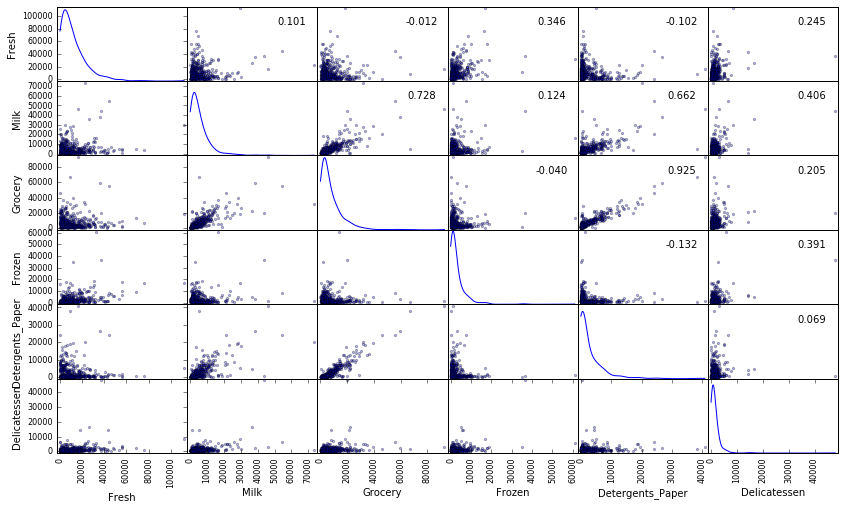

In [55]:
# Produce a scatter matrix for each pair of features in the data
#pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

**Grocery and Detergents , Grocery and Milk** have some correlation. Detergents and Milk also shows correlation to a small extent but its not significant. The rest don't seem to have any visible correlation. We can see this by looking at the correlation data at the top right of all the mini graphs.This can confirm that the information in the grocery column can be recovered using the Detergents and Milk data.

Most of the data for all the rest lies closer to the any one of the axis, the data is not normally distributed. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

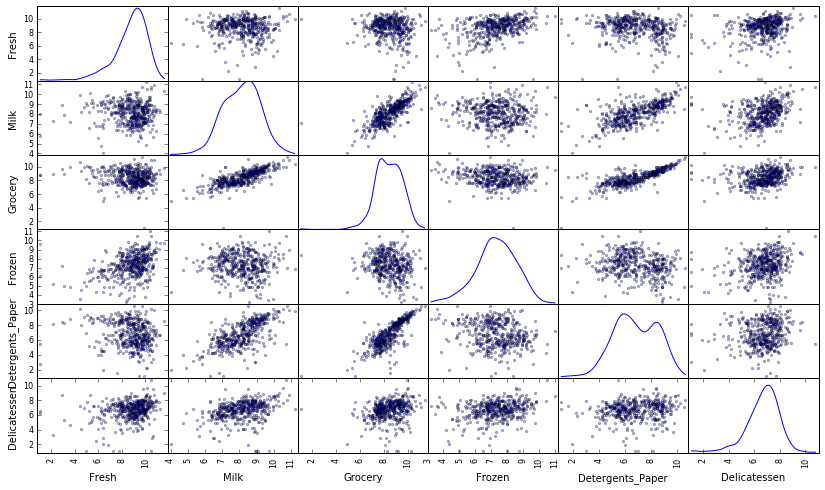

In [57]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [58]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
1,8.321908,9.927399,10.164197,7.054450,9.059982,8.557567
2,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [59]:
# For each feature find the data points with extreme high or low values
import collections

c = collections.Counter()
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    IQR = Q3-Q1
    step = IQR*1.5
    
    # Get the outliers and use a counter to find multiple establishments which have outliers
    outliers1 = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    for index, row in outliers1.iterrows():
        c[index] += 1

    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(outliers1)

# Get list of establishments which have outliers in two or more features
outliers_list = [] 
for i in c:
    if c[i]>=2:
        outliers_list.append(i)

# Print establishments having two or more outlier features
outliers_2 = log_data.loc[outliers_list]
print "Outlier DataFrame for datasets haveing two or more outlier features:"
display(outliers_2)

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [128, 154, 65, 66, 75]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outlier DataFrame for datasets haveing two or more outlier features:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There were 5 data points which had outliers for more than one feature as you can see from the last table above.

I will be removing these samples ie. 128, 154, 65, 66, 75. Since the values in these sample have outliers in at least two features. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Explained Variance per Principal Component


array([ 0.44302505,  0.70681723,  0.82988103,  0.93109011,  0.97959207,  1.        ])

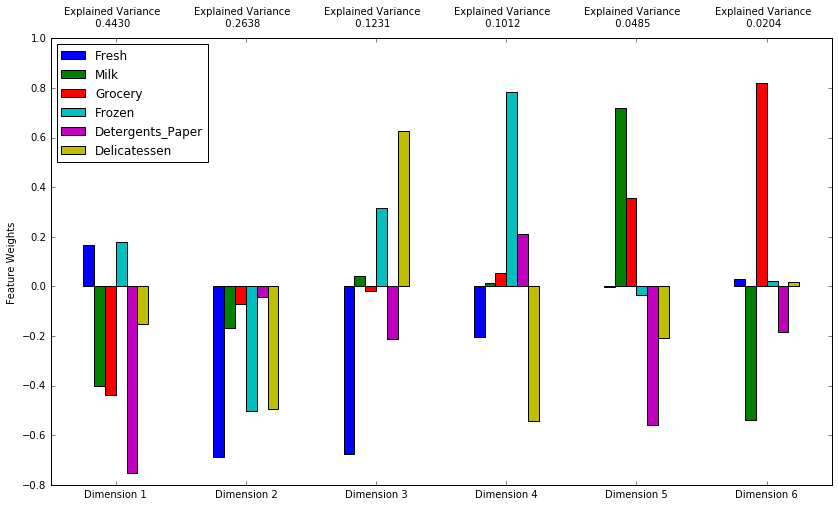

In [60]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

print "Explained Variance per Principal Component"
np.cumsum(pca.explained_variance_ratio_)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first two principal component explains **70.68%** of variance in the data.

The first four principal components explain **93.10%** of the variance.

The first component has a significant negative weight on the Detergents_Paper, Grocery and Milk. This would suggest that the customers which are represented by this principal component will have lower Grocery and Milk if they have lower number of Detergents_Paper and vice versa. This group seems to be those establishments which have a positive variation in only fresh and frozen.

The second component has negative weight on all the features which suggests that all the features move along the same direction. If there is lower number of any one feature , it is likely that these customers have lower values for other features too. 

The third prinicipal component has significant positive weight on Delicatessen and a significant negative component on Fresh.

The fourth prinicipal component has a significant positive weight on the Frozen feature while the negative weight is best represented by the Delicatessen. which suggests this group specializes in Frozen items only.

These PCA graphs let us know what kind of variation we can expect in each feature when we vary a particular feature. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [61]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.8096,-3.6459,1.0567,-0.5186,0.6999,-0.1811
1,-3.5695,-0.9977,0.9477,-0.5400,0.2579,0.0323
2,3.1848,-1.9448,0.2677,-0.6799,-0.2663,-0.5194


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [62]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [63]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.8096,-3.6459
1,-3.5695,-0.9977
2,3.1848,-1.9448


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

#### K - MEANS
The KMeans algorithm clusters data into separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. You just have to specify the nuber of clusters you need. The K-Means finds a centroid and in each iteration adjusts the location of the centroid so that it minimises the sum-of-squares. 

##### Advantages
K-Means is a simple and cost effective method to cluster. 
It can be used for large scale data and results are speedy. 
Usually works well with only spherical models, or classify data into spherical groups. 


#### GAUSSIAN MIXTURE MODEL
Gaussian Mixture Model takes a probabilistic approach. Unlike K-means which is hard clustering. This algorithm does  soft clustering , that is the grouping of the data points which are overlapped are given a probability. These points can fall into any one of the groups with a relevant probablity. This is the output of the GMM. The clustering will take different shapes and not just spherical as in K-Means.

##### Advantages
As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.


I will be using the K-Means Algorithm as this problem requires us to group customers into separate clusters with hard assignment. We have to differentiate which group will have problems with our delivery service schedule change. GMM will do the same, but we don't require the probabilities for this exercise. We just need them clustered. So I will be going with K-Means for faster processing and scalability.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [67]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Test out for various values of n_cluster ranging from 2 to 8
for k in range(2, 9):
    #kmeans 
    clusterer = KMeans(n_clusters=k).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn.metrics import silhouette_score
    score = silhouette_score(reduced_data, preds)

    print "%d Cluster K-Means has a silhouette score of %s"% (k,score)
    
    
# Use 2 as n_clusters and predict.
clusterer = KMeans(n_clusters = 2).fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# TODO: Find the cluster centers
centers = clusterer.cluster_centers_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

2 Cluster K-Means has a silhouette score of 0.426281015469
3 Cluster K-Means has a silhouette score of 0.39689092645
4 Cluster K-Means has a silhouette score of 0.333899164443
5 Cluster K-Means has a silhouette score of 0.350990778931
6 Cluster K-Means has a silhouette score of 0.361875694638
7 Cluster K-Means has a silhouette score of 0.363134145814
8 Cluster K-Means has a silhouette score of 0.351535151258


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

2 Cluster K-Means has a silhouette score of 0.426281015469  
3 Cluster K-Means has a silhouette score of 0.397138208845  
4 Cluster K-Means has a silhouette score of 0.331779859971  
5 Cluster K-Means has a silhouette score of 0.350990778931  
6 Cluster K-Means has a silhouette score of 0.356170696006  
7 Cluster K-Means has a silhouette score of 0.365222267759  
8 Cluster K-Means has a silhouette score of 0.356196811738  

**2 clusters has the best silhouette score of 0.4262**


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

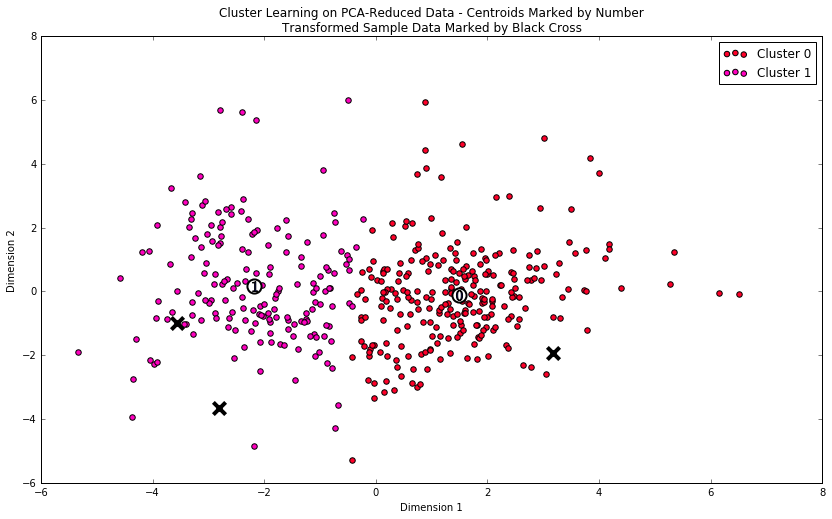

In [68]:
# Display the results of the clustering from implementation
import renders as rs
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


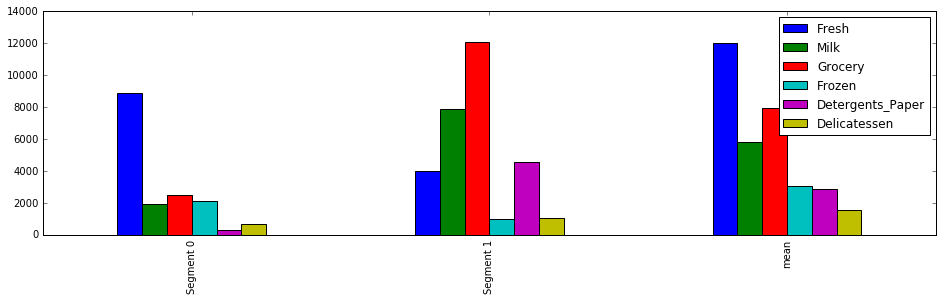

In [72]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
display(data.describe())

true_centers = true_centers.append(data.describe().ix['mean'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Segment 0 is some sort of a small market for all goods. With almost all the feature values below the mean as we see on the bar graph. Mostly a retailer which sells fresh fruits , vegetables and groceries. Something along the lines of a **convenience store to a small supermarket.**

Segment 1 seems to have groceries, milk above the mean and a few fresh produce. This looks like a **cafe** which sells a lot of coffee with cream, milk and uses low amount of detergents for cleaning dishes and keeping the cafe in good condition.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [76]:
# Display the predictions
display(samples)
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    print 'The distance between sample point {} and center of cluster {}:'.format(i, pred)
    print (samples.iloc[i] - true_centers.iloc[pred])
    


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,4113,20484,25957,1158,8604,5206
2,39228,1431,764,4510,93,2346


Sample point 0 predicted to be in Cluster 1
The distance between sample point 0 and center of cluster 1:
Fresh               22368.0
Milk                28523.0
Grocery              9915.0
Frozen               4202.0
Detergents_Paper     -224.0
Delicatessen        15487.0
dtype: float64
Sample point 1 predicted to be in Cluster 1
The distance between sample point 1 and center of cluster 1:
Fresh                 108.0
Milk                12584.0
Grocery             13853.0
Frozen                206.0
Detergents_Paper     4043.0
Delicatessen         4170.0
dtype: float64
Sample point 2 predicted to be in Cluster 0
The distance between sample point 2 and center of cluster 0:
Fresh               30361.0
Milk                 -466.0
Grocery             -1713.0
Frozen               2422.0
Detergents_Paper     -201.0
Delicatessen         1665.0
dtype: float64


**Answer:**

The answers are consistent with my observations as :

**Sample point 0** has a lot of items with high numbers in almost all columns,such as Fresh, Milm and Delicatessen which are 22368, 28523, 15487 respectively more than the centroid of the cluster. These numbers makes it looks like a large scale supermarket.Therefore, the cluster 1.

**Sample point 1** has milk, groceries and detergents values 12584, 13853, 4043 respectively more than the cluster center of 1. These values are in good numbers which I said is supposedly a **market** too. Therefore, the cluster 1.

**Sample point 2** has Fresh produce, few milk and other assorted items with values closer to the cluster 0 centroid. This according to my observation was supposed to be restaurant which specialises infresh food items. Therefore, the cluster 0.

The clustering of similar type of data can be seen.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

A/B testing is highly important before any company which has a lot of customers make drastic changes. 

In this particular example. When you change delivery service from 5 days a week to 3 days a week. The customers that rely on fresh produce on a daily basis will be affected. They will get the fresh items only 3 days a week. For example restaurants and fast food chains that work almost 24 hours will require items of fresh nature on a regular basis as for one they cannot store items to last long and moreover they can't sell food which is stale to customers. 

Whereas markets usually have cold storages and areas where they can keep goods for longer and stock up on items. Because of this even if they get items thrice a week, they might not be affected. Due to all of these reasons we can be sure that the change will affect different customers in a different ways.

In order to tackle this problem. The distributor should pick a few places for testing. Some of the places should come from the establishments which are to the far left of the cluster 1 and some to the far right of the cluster 0. This way he has a few customer which are the polar opposites of each other and can identify if the change in delivery service will affect any of them. 

moreover, he should also pick a few from the areas which divide the group into 2 clusters. So that he can be sure how to draw the differentiating line between the establishments that prefer 3 days a week vs 5 days a week. By following this he can determine which group of customers are affected by the change the most. 

We take 50% of the customers from each cluster randomly and test them with 3 days shipping. Validate which cluster is Happy/Unhappy with the new service. Based on this data, we can provide new 3 day shipping to that cluster which had a positive impact. If at all one of the test clusters had a negative overall impact, we will stick with 5 day shipping for those customers which fall into that cluster. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

A supervised learner with the target variables being the two segments which we clustered can be used. "Segment 0" and "Segment 1" can be added as a result for a feature say "Type of Customer" for every customer there is. Using this new dataset, we can train a model which will classify all the new customers into one of these groups.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

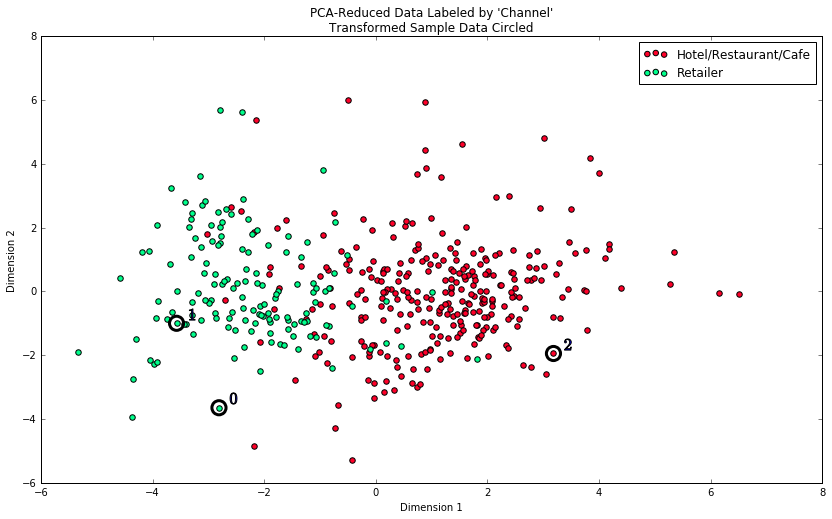

In [77]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The K-Means clustering algorithm does an excellent job in classifying the samples that we had into the 2 different groups. I got the best Silhouette Score for 2 component classification. It seems to match and be consistent with what we have above.

Other than the establishments which lie towards the imaginary line which divides the clusters , the rest can be classified as purely retailer or hotels. As we see in the abov data there is overlap. These are the customer we should worry about as they can be affected by the decision we take. But there is also a possibility that these customer which overlap wont be affected as since their purchase quantity is similar to the ones nearby they might as well as be okay with both types of delivery schemes. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.